#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Series , DataFrame
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# to read the data set file
titanic_df = pd.read_csv('Titanic-Dataset.xls')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# information about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

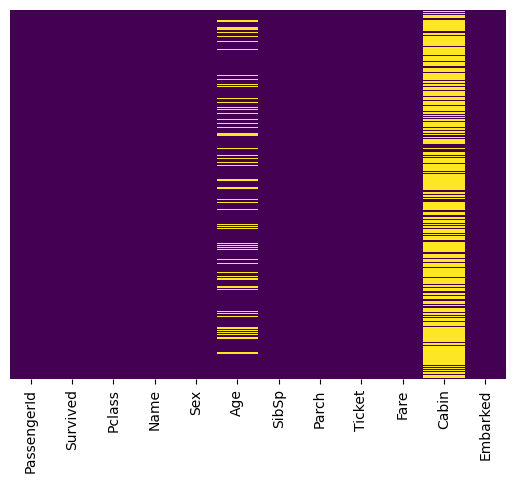

In [5]:
# to visualize the  null values in the dataset
sns.heatmap(titanic_df.isnull() , yticklabels=False , cbar =False , cmap='viridis')

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

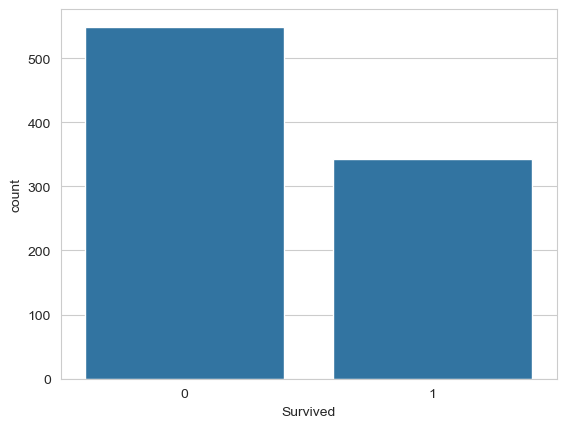

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data =titanic_df)

<Axes: xlabel='Sex', ylabel='count'>

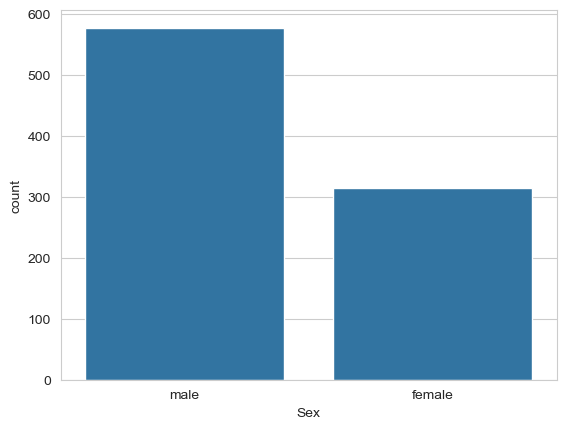

In [8]:
sns.countplot(x='Sex' , data = titanic_df)

<Axes: xlabel='Survived', ylabel='count'>

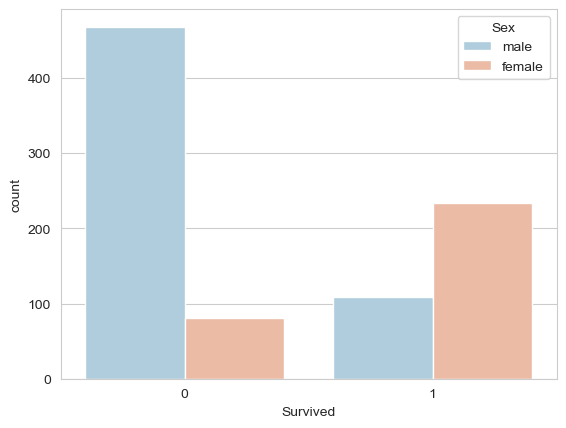

In [9]:
sns.countplot(x='Survived' , hue= 'Sex' ,data =titanic_df,palette ='RdBu_r')

<Axes: xlabel='Pclass', ylabel='count'>

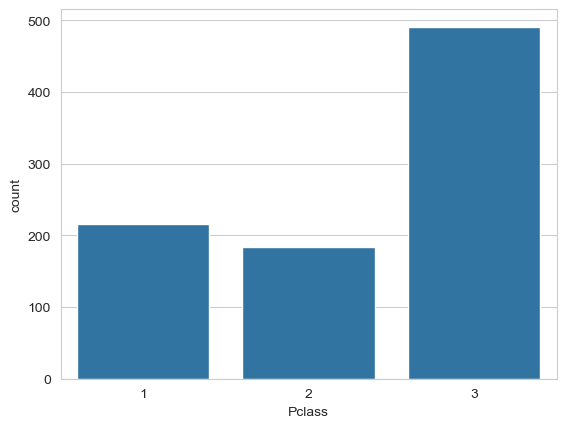

In [10]:
sns.countplot(x='Pclass' , data =titanic_df)

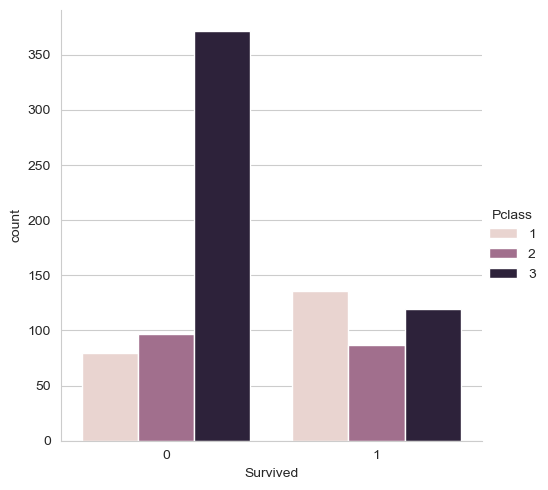

In [11]:
sns.catplot(x='Survived' , data =titanic_df, hue = 'Pclass', kind ='count')

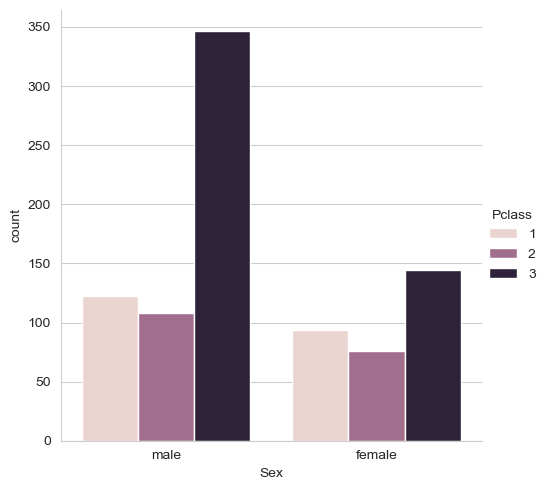

In [12]:
sns.catplot(x='Sex' , data =titanic_df, hue = 'Pclass', kind ='count')

<Axes: >

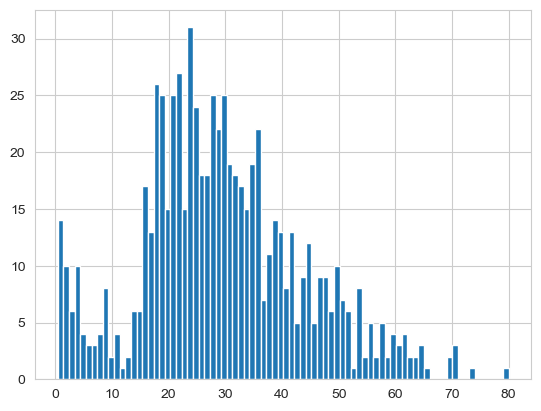

In [13]:
titanic_df['Age'].hist(bins=80)

<Axes: >

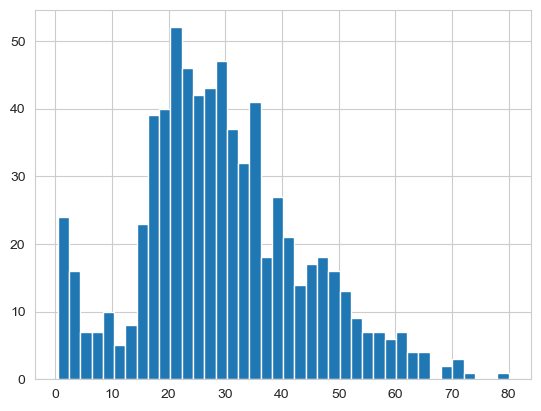

In [14]:
titanic_df['Age'].hist(bins=40)

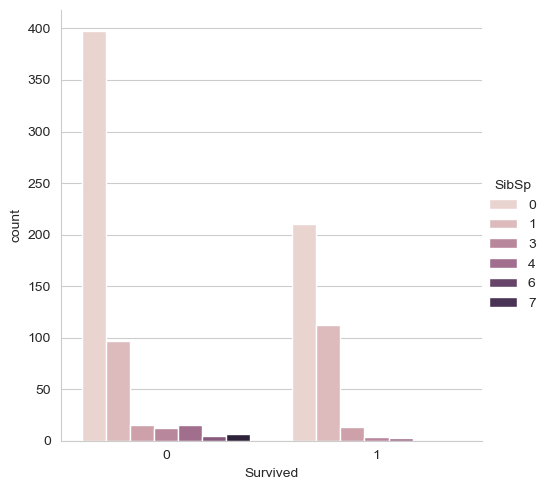

In [15]:
sns.catplot( x= 'Survived',data =titanic_df , hue = 'SibSp', kind ='count')

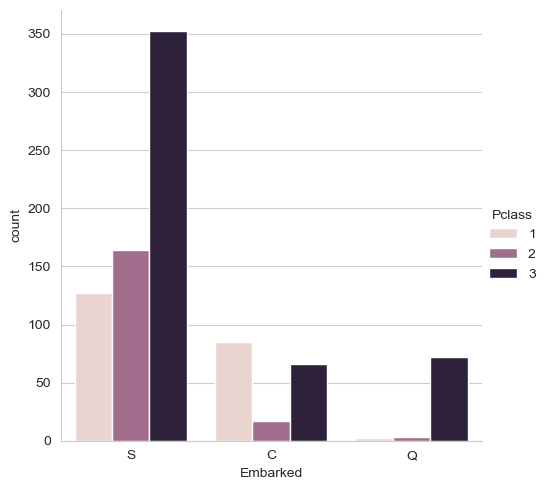

In [16]:
sns.catplot(x='Embarked', data= titanic_df , hue = 'Pclass', kind ='count')

Data Cleaning

In [17]:
titanic_df['Age'].mean()

29.69911764705882

In [18]:
titanic_df.groupby(by='Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [19]:
def m_age(c):
    Age=c[0]
    Pclass = c[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return (Age)

In [20]:
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(m_age,axis=1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_3116\1644864321.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=c[0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_3116\1644864321.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = c[1]


<Axes: >

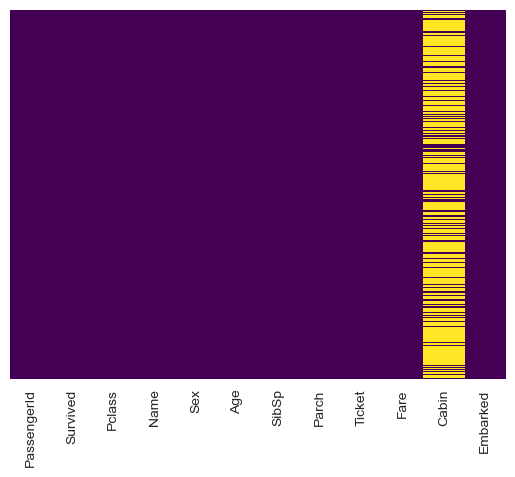

In [21]:
sns.heatmap(titanic_df.isnull(),yticklabels=False , cbar =False ,cmap ='viridis')

In [22]:
titanic_df.drop('Cabin' , axis =1 , inplace =True)

<Axes: >

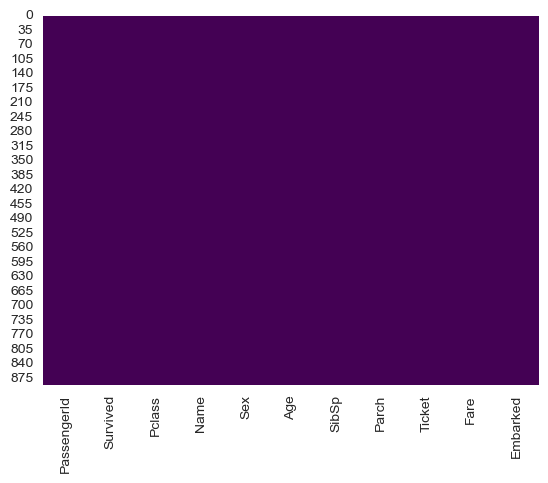

In [23]:
sns.heatmap(titanic_df.isnull() , cbar =False , cmap ='viridis')

In [24]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
titanic_df =titanic_df.dropna()

In [26]:
sex = pd.get_dummies(titanic_df['Sex'] ,drop_first =True)

In [27]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [28]:
embark= pd.get_dummies(titanic_df['Embarked'] ,drop_first =True)

In [29]:
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [30]:
titanic_df.drop(['Sex', 'Embarked' , 'Name', 'Ticket'], axis=1, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_3116\1077121998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df.drop(['Sex', 'Embarked' , 'Name', 'Ticket'], axis=1, inplace=True)


In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [32]:
titanic_df= pd.concat([titanic_df, sex, embark], axis =1)

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [36]:
cols_to_convert = ['male', 'S', 'Q']
titanic_df[cols_to_convert] = titanic_df[cols_to_convert].astype(int)

In [37]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
